# Quantum Computing Examples

In [1]:
# Needed for plotting
%matplotlib inline

## Circuit Examples

### Circuit 1

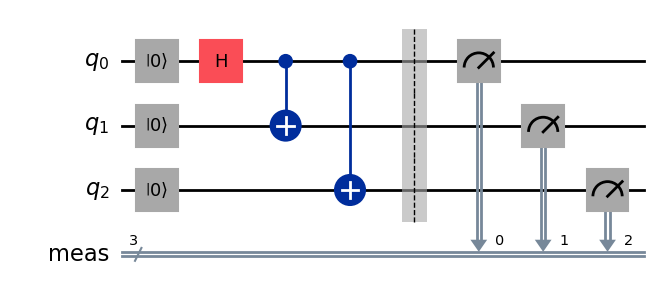

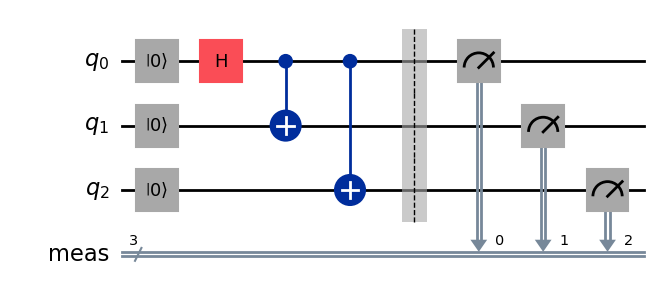

In [2]:
from qiskit import QuantumCircuit

# 3 qubits 
qc = QuantumCircuit(3)
# Optional reset, qiskit does it automatically
qc.reset(0)
qc.reset(1)
qc.reset(2)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
qc.draw(output="mpl")

### Circuit 2

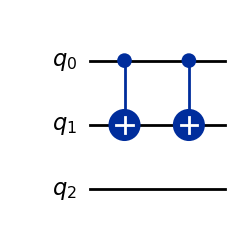

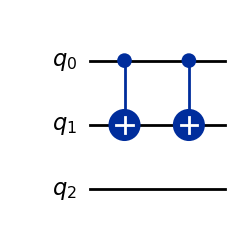

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CXGate
qc = QuantumCircuit(3)
cxg = CXGate()
qc.append(cxg,[0,1])
qc.append(cxg,[0,1])
qc.draw(output="mpl")

### Circuit 3

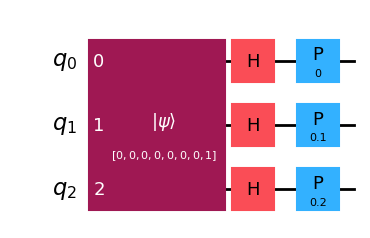

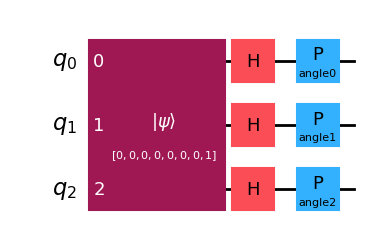

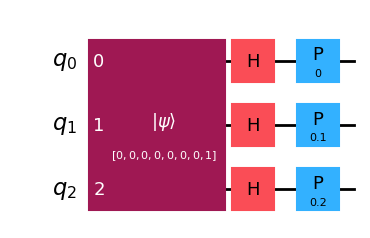

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

#Bind parameters

#make a template circuit
qc = QuantumCircuit(3)
qc.initialize([0,0,0,0,0,0,0,1])#initial state vector
param0 = Parameter("angle0")
param1 = Parameter("angle1")
param2 = Parameter("angle2")
qc.h(0)
qc.h(1)
qc.h(2)
qc.p(param0,0)
qc.p(param1,1)
qc.p(param2,2)
qc.draw(output="mpl")

#make a circuit from the template
#NOTE bind_parameters has become assign_parameters in the latest version of qiskit
qcinstance = qc.assign_parameters({param0:0.0  , param1:0.1 , param2:0.2 })
qcinstance.draw(output="mpl")

### Circuit 4

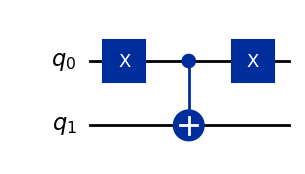

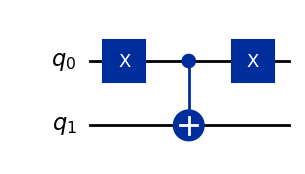

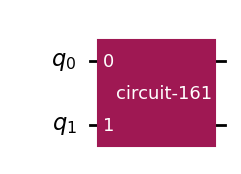

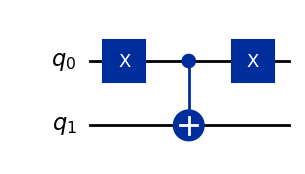

In [5]:
from qiskit import QuantumCircuit

#Make a custom gate
gatesource = QuantumCircuit(2)
gatesource.x(0)
gatesource.cx(0,1)
gatesource.x(0)
xcnotxgate = gatesource.to_gate()
gatesource.draw(output="mpl")

customgateqc = QuantumCircuit(2)
customgateqc.append(xcnotxgate,[0,1])
customgateqc.draw(output="mpl")
customgateqc.decompose().draw(output="mpl")

### Circuit 5

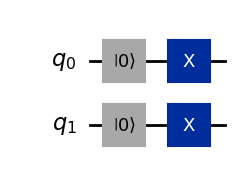

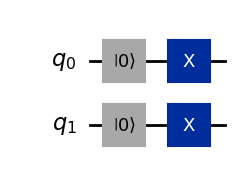

In [6]:
from qiskit import QuantumCircuit

#Make a qubit setter
instrsource = QuantumCircuit(1)
instrsource.reset(0)
instrsource.x(0)
setqubit = instrsource.to_instruction()

custominstrqc = QuantumCircuit(2)
custominstrqc.append(setqubit,[0])
custominstrqc.append(setqubit,[1])
custominstrqc.decompose().draw(output="mpl")

## Other Quantum Examples

### Simulate Circuit


Totals for 00 and 11 are: {'00': 496, '11': 504}
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


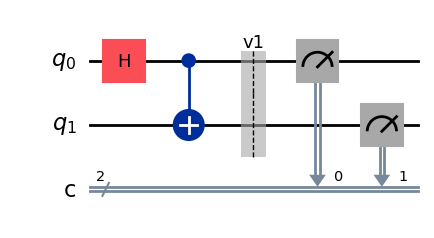

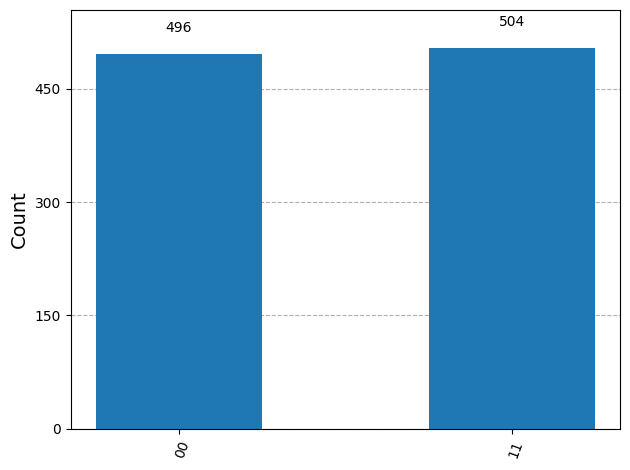

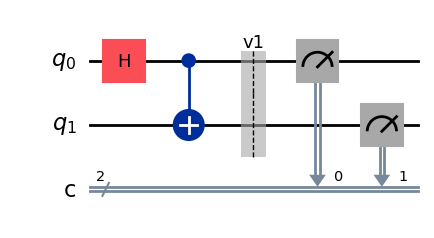

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

# Prepare simulator
simulator = Aer.get_backend("aer_simulator")

# Create a 2 qubit Quantum Circuit. With 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

#Save the current state vector to be retrieved later
circuit.save_statevector(label='v1')

# Measure the qubits and save to classical bits
circuit.measure([0,1], [0,1])

# compile the circuit to simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator. 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()

# Get counts from results
counts = result.get_counts(compiled_circuit)
print("\nTotals for 00 and 11 are:",counts)

plot_histogram(counts)

# Get state vector that was saved earlier
print(result.data(0)['v1'])

# Draw the circuit. 
# If Spyder was set up correctly, it will display in a seaparate window.
circuit.draw(output = "mpl")



### Shor

Algorithms that were deprecated and are now removed entirely from qiskit.algorithms. These are algorithms that do not serve as building blocks for applications and are only valuable for education, as described in the following tutorials:
Linear Solvers (HHL) ,
Factorizers (Shor)

https://docs.quantum.ibm.com/migration-guides/qiskit-algorithms-module

In [8]:
# from qiskit_aer import Aer
# from qiskit_aer.primitives import Sampler
# from qiskit.algorithms import Shor

# # Use Aer Sampler primitive instead of QuantumInstance
# sampler = Sampler(
#     backend_options={},
#     run_options={"shots": 1000},  # Default number of shots
# )

# shor = Shor(sampler=sampler)

# result = shor.factor(N=15, a=7)
# print('Factors:', result.factors)

### Compute Matrix

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


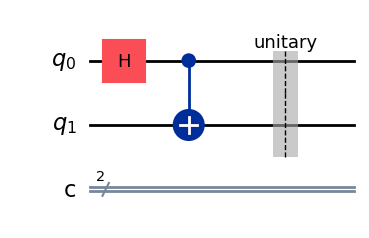

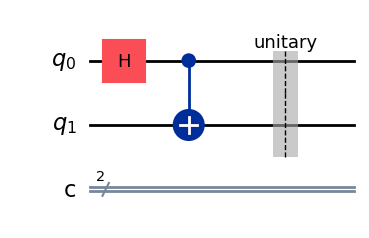

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

simulator = Aer.get_backend("aer_simulator")

circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and acting on qubit 1
circuit.cx(0, 1)

# Save the matrix of the circuit until this point
circuit.save_unitary()

compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit)

result = job.result()

# Print the unitary matrix representation of circuit
print(result.get_unitary(circuit,3)) # 3 is the number of digits of precision

circuit.draw(output = "mpl")



### BB84

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

simulator = Aer.get_backend("aer_simulator")


#Compute a random bit to send
randomBitCircuit = QuantumCircuit(1,1)
randomBitCircuit.x(0)
randomBitCircuit.barrier()
randomBitCircuit.h(0)
randomBitCircuit.barrier()
randomBitCircuit.measure(0,0)

randomBitCompiledCircuit = transpile(randomBitCircuit, simulator)
job = simulator.run(randomBitCompiledCircuit, shots = 1)
result = job.result()
counts = result.get_counts(randomBitCompiledCircuit)
if("1" in counts.keys()):
    bitToSend = 1
else:
    bitToSend = 0
    
print("Bit to Send = " + str(bitToSend))
    
#Compute a random basis to use for sending
randomSendBasisCircuit = QuantumCircuit(1,1)
randomSendBasisCircuit.x(0)
randomSendBasisCircuit.barrier()
randomSendBasisCircuit.h(0)
randomSendBasisCircuit.barrier()
randomSendBasisCircuit.measure(0,0)

randomSendBasisCompiledCircuit = transpile(randomSendBasisCircuit, simulator)
job = simulator.run(randomSendBasisCompiledCircuit, shots = 1)
result = job.result()
counts = result.get_counts(randomSendBasisCompiledCircuit)
if("1" in counts.keys()):
    sendBasis = 1
else:
    sendBasis = 0
    
print("Send Basis = " + str(sendBasis))

#Compute a random basis to use for receiving
randomRecvBasisCircuit = QuantumCircuit(1,1)
randomRecvBasisCircuit.x(0)
randomRecvBasisCircuit.barrier()
randomRecvBasisCircuit.h(0)
randomRecvBasisCircuit.barrier()
randomRecvBasisCircuit.measure(0,0)

randomRecvBasisCompiledCircuit = transpile(randomRecvBasisCircuit, simulator)
job = simulator.run(randomRecvBasisCompiledCircuit, shots = 1)
result = job.result()
counts = result.get_counts(randomRecvBasisCompiledCircuit)
if("1" in counts.keys()):
    recvBasis = 1
else:
    recvBasis = 0
    
print("Receive Basis = " + str(recvBasis))

#Quantum Send
commCircuit = QuantumCircuit(1,1)
if(bitToSend==1):
    commCircuit.x(0) 
if(sendBasis==1):
    commCircuit.h(0) # Change the basis
    
#Quantum Receive
if(recvBasis==1):
    commCircuit.h(0) # HH = I. So this will reverse the earlier basis change
commCircuit.measure(0,0)


commCompiledCircuit = transpile(commCircuit, simulator)
job = simulator.run(commCompiledCircuit, shots = 1)
result = job.result()
counts = result.get_counts(commCompiledCircuit)

if("1" in counts.keys()):
    recvBit = 1
else:
    recvBit = 0
    
#If the basis are the same, the received bit should be the same as the sent bit
if(sendBasis==recvBasis):
    print("Sent Bit = "+str(bitToSend)+" Received Bit = "+str(recvBit))
else:
    print("Bit was lost because basis didn't match")


Bit to Send = 1
Send Basis = 0
Receive Basis = 0
Sent Bit = 1 Received Bit = 1


## Quantum Machine Learning

### K-Nearest Neighbours

Classical Machine Learning:
P(1) =  0.5244421365167681     P(0) =  0.475557863483232

Quantum Machine Learning:
P(1) =  0.5342761524344165     P(0) =  0.4657238475655835


Intermediate State Vectors:
After Hadamard  Statevector([ 0.        +0.00000000e+00j,  0.64692786-3.68027968e-17j,
              0.        +0.00000000e+00j,  0.25696062-2.28090745e-17j,
              0.40657751-3.68027968e-17j,  0.        +0.00000000e+00j,
              0.5235206 -2.28090745e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.04589258+3.68027968e-17j,
              0.        +0.00000000e+00j, -0.11553983+2.28090745e-17j,
             -0.19445778+3.68027968e-17j,  0.        +0.00000000e+00j,
              0.15102015+2.28090745e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))
After Measuring Qubit3  Statevector([ 0.        +0.00000000e+00j,  0.67303531-3.82880118e-17j,
              0.        +0.00000000e+00j,  0.26733053-2.37295584e-17j,
              0.42

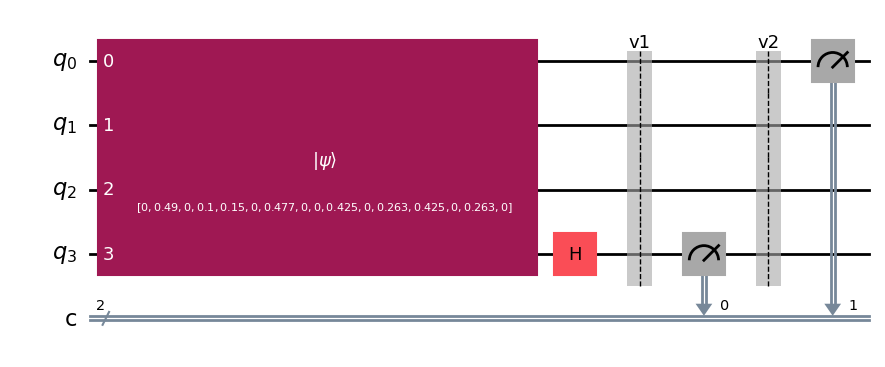

In [5]:
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

trainingData = [[0.9798, 0.2, 1],[0.3, 0.954, 0]] # x, y and resolution, e.g. passwnger and driver rating and 1 resoultion in favor of user
queryData = [0.85, 0.5268]

## Classical Machine Learning

# Normalize trainingData
vecLen = math.sqrt(trainingData[0][0]**2 + trainingData[0][1]**2);
trainingData[0][0] = trainingData[0][0]/vecLen
trainingData[0][1] = trainingData[0][1]/vecLen
# Assert that the normalized values sum to 1, needed tobe used as unit length vectors in quantum circuit
assert abs((trainingData[0][0]**2 + trainingData[0][1]**2) - 1.0) < 1e-10, "First training data point not normalized to 1"

vecLen = math.sqrt(trainingData[1][0]**2 + trainingData[1][1]**2);
trainingData[1][0] = trainingData[1][0]/vecLen
trainingData[1][1] = trainingData[1][1]/vecLen

# Normalize queryData
vecLen = math.sqrt(queryData[0]**2 + queryData[1]**2);
queryData[0] = queryData[0]/vecLen
queryData[1] = queryData[1]/vecLen

# Compute Euclidean Distances Squared
euclideanDistanceSquared = [0,0]
euclideanDistanceSquared[0] = (queryData[0]-trainingData[0][0])**2 + (queryData[1]-trainingData[0][1])**2
euclideanDistanceSquared[1] = (queryData[0]-trainingData[1][0])**2 + (queryData[1]-trainingData[1][1])**2

# Compute Weights
weights = [0,0]
weights[0] = 1 - 0.25*euclideanDistanceSquared[0]
weights[1] = 1 - 0.25*euclideanDistanceSquared[1]

# Normalize Weights
weightSum = (weights[0] + weights[1])
weights[0] = weights[0] / weightSum
weights[1] = weights[1] / weightSum

print("Classical Machine Learning:")
print("P(1) = ",weights[0],"    P(0) = ",weights[1])
print("")


## Quantum Machine Learning

simulator = Aer.get_backend("aer_simulator")

circuit = QuantumCircuit(4,2) # 4 qubits and 2 classical bits
initial_state = [
    0,
    trainingData[0][0]/2,
    0,
    trainingData[0][1]/2,
    trainingData[1][0]/2,
    0,
    trainingData[1][1]/2,
    0,
    0,
    queryData[0]/2,
    0,
    queryData[1]/2,
    queryData[0]/2,
    0,
    queryData[1]/2,
    0
]
circuit.initialize(initial_state)
circuit.h(3) # Hadamard gate on qubit 3
circuit.save_statevector(label='v1')
circuit.measure(3,0)
circuit.save_statevector(label='v2')
circuit.measure(0,1)

# compile the circuit to simulator
compiled_circuit = transpile(circuit, simulator)
# Execute the circuit on the simulator. 1000 times.
numerator = 0
denominator = 0
for i in range(0,10000):
    job = simulator.run(compiled_circuit, shots=1)
    # Get results
    result = job.result()
    # Get counts from results
    counts = result.get_counts(compiled_circuit)
    if("00" in counts or "10" in counts):
        stateAfterMeasuringQ3 = result.data(0)['v2']
        denominator += 1
        if("10" in counts):
            numerator += 1
    
print("Quantum Machine Learning:")
print("P(1) = ",numerator/denominator,"    P(0) = ",(denominator-numerator)/denominator)
print("")
print("")
print("Intermediate State Vectors:")
print("After Hadamard ",result.data(0)['v1'])
print("After Measuring Qubit3 ",stateAfterMeasuringQ3)
circuit.draw(output = "mpl")



### Support Vector Machines

In [ ]:
## qiskit-machine-learning doesn't work with qiskit 2.0.0

from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler


# IRIS Data Set
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data)
print(iris.target)
print(iris.target_names)
dimension = len(iris.data[0])

adhoc_dimension = len(iris.data[0])
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

qsvc = QSVC(quantum_kernel=adhoc_kernel)

qsvc.fit(iris.data,iris.target)

print(qsvc.predict([[5.0, 3.3, 1.5, 0.3], 
                    [6.0, 2.9, 5.2, 1.7]]))


ImportError: cannot import name 'BaseEstimator' from 'qiskit.primitives' (/Users/admin/src/edu/quantum_computing/qiskit/.venv/lib/python3.13/site-packages/qiskit/primitives/__init__.py)